In [9]:
import pandas as pd
beg_inv=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\Project2\\BegInvFINAL12312016.csv")
beg_inv = beg_inv.rename(columns={"onHand": "BeginningInventory"})
beg_inv.head()

,InventoryId,Store,City,Brand,Description,Size,BeginningInventory,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [3]:
end_inv=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\Project2\\EndInvFINAL12312016.csv")
invoice=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\Project2\\InvoicePurchases12312016.csv")
sales_purchase=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\Project2\\sales_and_purchase_prices.csv")

In [10]:
end_inv = end_inv.rename(columns={"onHand": "EndingInventory"})
end_inv.head()

,InventoryId,Store,City,Brand,Description,Size,EndingInventory,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [5]:
invoice.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [6]:
sales_purchase.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,Amount,PurchasePrice
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,17.28,10.65
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,34.55,10.65
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,17.28,10.65
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,15.28,10.65
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,750.0,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY,70.77,27.34


In [ ]:
import pandas as pd
beg = pd.read_csv("BegInvFINAL12312016.csv")
end = pd.read_csv("EndInvFINAL12312016.csv")
sales = pd.read_csv("PurchasesFINAL12312016.csv")

beg = beg.rename(columns={"onHand": "BeginningInventory"})
beg = beg[["InventoryId", "BeginningInventory"]]


end = end.rename(columns={"onHand": "EndingInventory"})
end = end[["InventoryId", "EndingInventory"]]


merged = (
    sales
    .merge(beg, on="InventoryId", how="left")
    .merge(end, on="InventoryId", how="left")
)


merged = merged.loc[:, ~merged.columns.duplicated()]


merged.to_csv("master_inventory_clean2.csv", index=False)

# Show preview
merged.head()


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,BeginningInventory,EndingInventory
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1,5.0,3.0
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1,0.0,7.0
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1,39.0,18.0
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1,6.0,15.0
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1,3.0,5.0


In [12]:
merged.head(20)

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,BeginningInventory,EndingInventory
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1,5.0,3.0
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1,0.0,7.0
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1,39.0,18.0
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1,6.0,15.0
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1,3.0,5.0
5,5_SUTTON_3348,5,3348,Bombay Sapphire Gin,1.75L,480,BACARDI USA INC,8106,2015-12-20,2016-01-02,2016-01-12,2016-02-05,22.38,6,134.28,1,17.0,15.0
6,1_HARDERSFIELD_8358,1,8358,Bacardi 151 Proof,750mL,480,BACARDI USA INC,8106,2015-12-20,2016-01-01,2016-01-12,2016-02-05,14.49,12,173.88,1,3.0,NaN
7,30_CULCHETH_4903,30,4903,Bacardi Superior Rum,200mL,480,BACARDI USA INC,8106,2015-12-20,2016-01-01,2016-01-12,2016-02-05,2.87,48,137.76,1,105.0,NaN
8,34_PITMERDEN_3782,34,3782,Grey Goose Le Citron Vodka,750mL,480,BACARDI USA INC,8106,2015-12-20,2016-01-02,2016-01-12,2016-02-05,18.89,5,94.45,1,59.0,28.0
9,1_HARDERSFIELD_4233,1,4233,Castillo Silver Label Rum,1.75L,480,BACARDI USA INC,8106,2015-12-20,2016-01-01,2016-01-12,2016-02-05,7.87,23,181.01,1,2.0,28.0


In [11]:
merged["EndingInventory"] = merged["EndingInventory"].fillna(0)

In [22]:
merged.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,Amount,PurchasePrice,BeginningInventory,EndingInventory
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,17.28,10.65,17.0,0.0
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,34.55,10.65,17.0,0.0
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,17.28,10.65,17.0,0.0
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,15.28,10.65,17.0,0.0
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,750.0,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY,70.77,27.34,7.0,0.0


In [ ]:
import pandas as pd


inv = pd.read_csv("InvoicePurchases12312016.csv")


inv["PODate"] = pd.to_datetime(inv["PODate"])
inv["PayDate"] = pd.to_datetime(inv["PayDate"])


inv["LeadTime"] = (inv["PayDate"] - inv["PODate"]).dt.days


inv.to_csv("InvoicePurchases_with_leadtime.csv", index=False)

inv.head()


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval,LeadTime
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN,57
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN,61
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN,54
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN,47
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN,50


In [ ]:
import pandas as pd


master = pd.read_csv("master_inventory_clean.csv")
inv = pd.read_csv("InvoicePurchases_with_leadtime.csv")

In [14]:
master.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,Amount,PurchasePrice,BeginningInventory,EndingInventory
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,17.28,10.65,17.0,NaN
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,34.55,10.65,17.0,NaN
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,17.28,10.65,17.0,NaN
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,15.28,10.65,17.0,NaN
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,750.0,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY,70.77,27.34,7.0,NaN


In [6]:
inv.head()

,VendorNo,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval,LeadTime
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN,57
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN,61
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN,54
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN,47
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN,50


In [17]:
print(master["VendorNo"].nunique())
print(inv["VendorNumber"].nunique())

116
126


In [15]:
import pandas as pd

master = pd.read_csv("master_inventory_clean2.csv")
inv = pd.read_csv("InvoicePurchases_with_leadtime.csv")


if "VendorNumber" in inv.columns:
    inv = inv.rename(columns={"VendorNumber": "VendorNo"})
if "VendorNumber" in master.columns:
    master = master.rename(columns={"VendorNumber": "VendorNo"})


inv_vendor = inv.groupby("VendorNo")[["Freight"]].mean().reset_index()


merged = master.merge(inv_vendor, on="VendorNo", how="left")


merged = merged.loc[:, ~merged.columns.duplicated()]


merged.to_csv("final_inventory_dataset_final.csv", index=False)

merged.head()


,InventoryId,Store,Brand,Description,Size,VendorNo,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,BeginningInventory,EndingInventory,Freight
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1,5.0,3.0,1.559750
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1,0.0,7.0,14.434727
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1,39.0,18.0,14.434727
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1,6.0,15.0,14.434727
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1,3.0,5.0,3.995094


In [ ]:
import pandas as pd


df_main = pd.read_csv("final_inventory_dataset_final.csv")
df_extra = pd.read_csv("sales_and_purchase_prices.csv")


df_extra_small = df_extra[["InventoryId", "SalesQuantity", "SalesPrice"]]


merged = df_main.merge(df_extra_small, on="InventoryId", how="left")

merged = merged.loc[:, ~merged.columns.duplicated()]
merged.to_csv("recalculated.csv", index=False)

print("Merge complete! Saved as final_merged_dataset.csv")
print("Rows:", len(merged))
print("Columns:", len(merged.columns))


Merge complete! Saved as final_merged_dataset.csv
Rows: 24628223
Columns: 21


In [6]:
import pandas as pd
merged=pd.read_csv("recalculated.csv")

In [ ]:
print(merged.columns)

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNo',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification',
       'BeginningInventory', 'EndingInventory', 'Freight', 'SalesQuantity',
       'SalesPrice'],
      dtype='object')


In [ ]:
import os
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.model_selection import KFold, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


try:
    from xgboost import XGBRegressor
    XGB_AVAILABLE = True
except Exception:
    XGB_AVAILABLE = False

try:
    from lightgbm import LGBMRegressor
    LGB_AVAILABLE = True
except Exception:
    LGB_AVAILABLE = False



INPUT_CSV = "final_inventory_dataset.csv"
MODELS_DIR = "models_saved"
os.makedirs(MODELS_DIR, exist_ok=True)

CV_FOLDS = 5
RANDOM_STATE = 42

df = pd.read_csv(INPUT_CSV)

df["SalesDate"] = pd.to_datetime(df["SalesDate"], errors="coerce")
df["YearMonth"] = df["SalesDate"].dt.to_period("M").dt.to_timestamp()

for col in ["EndingInventory", "Freight", "PurchasePrice", "SalesQuantity", "LeadTime", "SalesPrice"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["EndingInventory"] = df["EndingInventory"].fillna(0)
df["Freight"] = df["Freight"].fillna(0)
df["PurchasePrice"] = df["PurchasePrice"].fillna(df["PurchasePrice"].median())
df["SalesPrice"] = df["SalesPrice"].fillna(df["SalesPrice"].median())

agg = df.groupby(
    ["InventoryId", "Store", "Brand", "YearMonth"], as_index=False
).agg({
    "SalesQuantity": "sum",
    "SalesPrice": "mean",
    "PurchasePrice": "mean",
    "Freight": "mean",
    "EndingInventory": "mean",
    "BeginningInventory": "mean",
    "LeadTime": "mean",
    "VendorNo": "first",
    "VendorName": "first",
    "Description": "first",
    "Size": "first"
}).rename(columns={"SalesQuantity": "MonthlySales", "SalesPrice": "AvgSalesPrice"})

agg = agg.sort_values(["InventoryId", "YearMonth"]).reset_index(drop=True)

months = sorted(agg["YearMonth"].unique())
print("Detected months:", months)

if len(months) < 2:
    raise ValueError("Dataset must contain at least 2 months.")

min_month = months[0]    
max_month = months[-1]    

jan = agg[agg["YearMonth"] == min_month].copy()
feb = agg[agg["YearMonth"] == max_month].copy()

common_skus = set(jan["InventoryId"]).intersection(set(feb["InventoryId"]))
jan = jan[jan["InventoryId"].isin(common_skus)].sort_values("InventoryId").reset_index(drop=True)
feb = feb[feb["InventoryId"].isin(common_skus)].sort_values("InventoryId").reset_index(drop=True)

print("SKUs used for ML:", len(common_skus))

y = feb["MonthlySales"].values 
jan["JanSales"] = jan["MonthlySales"]
jan["LandedCost"] = jan["PurchasePrice"] + jan["Freight"]
jan["ProfitPerUnit"] = jan["AvgSalesPrice"] - jan["LandedCost"]
jan["month"] = jan["YearMonth"].dt.month
jan["year"] = jan["YearMonth"].dt.year

numeric_features = [
    "JanSales", "AvgSalesPrice", "PurchasePrice", "Freight",
    "LandedCost", "ProfitPerUnit", "LeadTime",
    "EndingInventory", "BeginningInventory",
    "month", "year"
]

categorical_features = ["Brand", "Store", "VendorNo", "Size"]

X_raw = jan[numeric_features + categorical_features].reset_index(drop=True)


for col in categorical_features:
    X_raw[col] = X_raw[col].astype(str)



numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


preprocessor.fit(X_raw)
X = preprocessor.transform(X_raw)



models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(random_state=RANDOM_STATE),
    "Lasso": Lasso(random_state=RANDOM_STATE),
    "DecisionTree": DecisionTreeRegressor(random_state=RANDOM_STATE),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1),
    "KNN": KNeighborsRegressor(n_neighbors=5),
}

if XGB_AVAILABLE:
    models["XGBoost"] = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=RANDOM_STATE)

if LGB_AVAILABLE:
    models["LightGBM"] = LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=RANDOM_STATE)

kf = KFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_STATE)

scoring = {
    "neg_mae": "neg_mean_absolute_error",
    "neg_mse": "neg_mean_squared_error",
    "r2": "r2"
}

results_list = []

for name, estimator in models.items():
    print(f"\nRunning CV for {name}...")
    pipe = Pipeline([("model", estimator)])

    cv_res = cross_validate(
        pipe, X, y, cv=kf, scoring=scoring,
        return_train_score=False, n_jobs=-1
    )

    mae = -cv_res["test_neg_mae"]
    rmse = np.sqrt(-cv_res["test_neg_mse"])
    r2 = cv_res["test_r2"]

    print(f"{name}:  MAE={mae.mean():.3f} ± {mae.std():.3f}, "
          f"RMSE={rmse.mean():.3f} ± {rmse.std():.3f}, "
          f"R²={r2.mean():.3f}")

    results_list.append({
        "model": name,
        "MAE_mean": mae.mean(), "MAE_std": mae.std(),
        "RMSE_mean": rmse.mean(), "RMSE_std": rmse.std(),
        "R2_mean": r2.mean(), "R2_std": r2.std(),
    })


summary_df = pd.DataFrame(results_list).sort_values("RMSE_mean")
summary_df.to_csv(os.path.join(MODELS_DIR, "cv_model_comparison.csv"), index=False)

print("\nSaved model comparison:", os.path.join(MODELS_DIR, "cv_model_comparison.csv"))

for name, estimator in models.items():
    print("Saving model:", name)
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", estimator)
    ])
    pipe.fit(X_raw, y)
    joblib.dump(pipe, os.path.join(MODELS_DIR, f"{name}_model.joblib"))

print("\nAll models saved in:", MODELS_DIR)

preds_df = pd.DataFrame({"InventoryId": jan["InventoryId"], "Actual_Feb": y})

for name in models.keys():
    pipe = joblib.load(os.path.join(MODELS_DIR, f"{name}_model.joblib"))
    preds_df[f"Pred_{name}"] = pipe.predict(X_raw)

preds_df.to_csv(os.path.join(MODELS_DIR, "cv_predictions_all_models.csv"), index=False)
print("\nSaved predictions:", os.path.join(MODELS_DIR, "cv_predictions_all_models.csv"))

print("\nDONE ✓ Cross-validation complete.")

Detected months: [Timestamp('2016-01-01 00:00:00'), Timestamp('2016-02-01 00:00:00')]
SKUs used for ML: 16932

Running CV for LinearRegression...
LinearRegression:  MAE=7.422 ± 0.127, RMSE=15.636 ± 1.192, R²=0.713

Running CV for Ridge...
Ridge:  MAE=7.032 ± 0.102, RMSE=15.305 ± 1.228, R²=0.725

Running CV for Lasso...
Lasso:  MAE=7.348 ± 0.161, RMSE=16.954 ± 1.202, R²=0.664

Running CV for DecisionTree...
DecisionTree:  MAE=8.345 ± 0.214, RMSE=19.625 ± 1.437, R²=0.545

Running CV for RandomForest...
RandomForest:  MAE=6.479 ± 0.113, RMSE=15.643 ± 1.237, R²=0.713

Running CV for ExtraTrees...
ExtraTrees:  MAE=6.440 ± 0.120, RMSE=15.582 ± 1.351, R²=0.714

Running CV for KNN...
KNN:  MAE=7.447 ± 0.113, RMSE=16.830 ± 1.139, R²=0.669

Running CV for XGBoost...
XGBoost:  MAE=6.758 ± 0.135, RMSE=15.664 ± 1.094, R²=0.713

Running CV for LightGBM...
LightGBM:  MAE=6.803 ± 0.112, RMSE=15.901 ± 1.067, R²=0.704

Saved model comparison: models_saved\cv_model_comparison.csv
Saving model: LinearRegr

d:\Project\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



Saved predictions: models_saved\cv_predictions_all_models.csv

DONE ✓ Cross-validation complete.


Loaded rows: 24628223
Months total: 11
Train months: 8 | Test months: 3
Train rows: 701725 | Test rows: 230014

Training LinearRegression...

Training Ridge...

Training Lasso...

Training DecisionTree...

Training RandomForest...

Training ExtraTrees...

Training KNN...

Training XGBoost...

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4172
[LightGBM] [Info] Number of data points in the train set: 701725, number of used features: 19
[LightGBM] [Info] Start training from score 74.258036

RESULTS:

              model        MAE        RMSE        R2
7           XGBoost  27.887144   96.940049  0.892775
5        ExtraTrees  27.381483   96.977049  0.892693
8          LightGBM  28.108569   98.050641  0.890304
4      RandomForest  27.832886   99.037854  0.888084
6

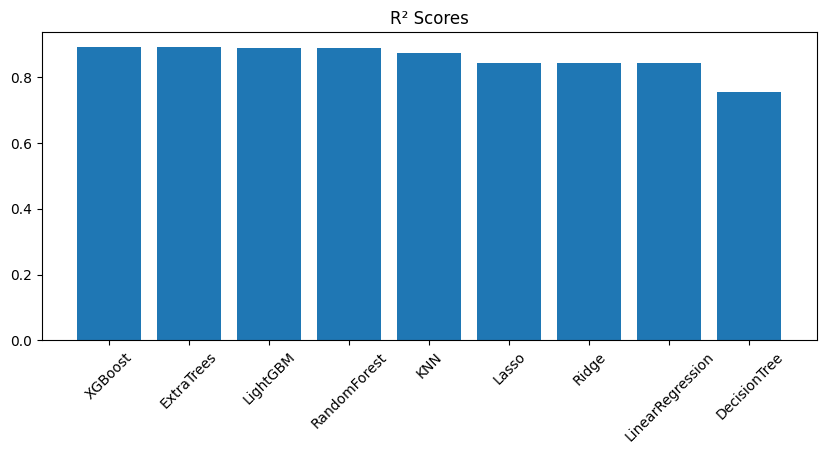

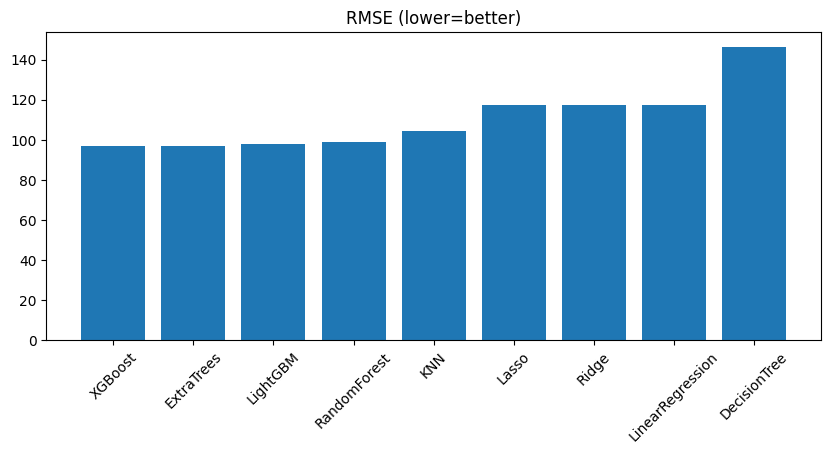

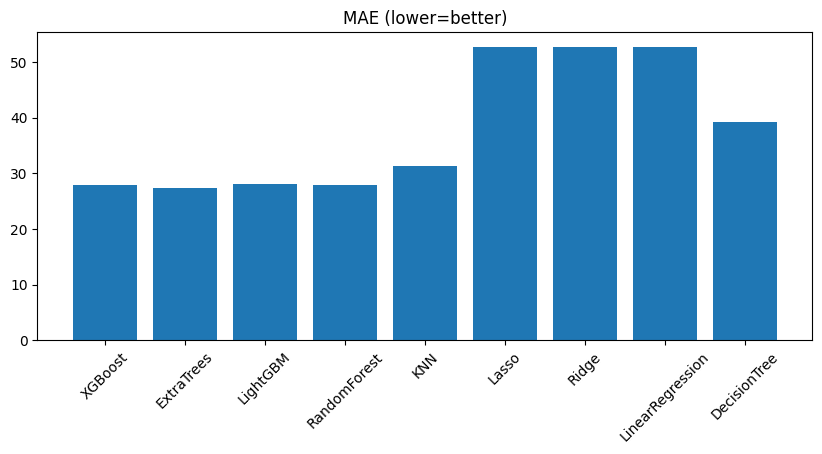


ALL DONE — Models + Metrics + Predictions Saved At: models_saved1


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

INPUT_CSV = "recalculated.csv"
MODELS_DIR = "models_saved1"
os.makedirs(MODELS_DIR, exist_ok=True)

use_cols = [
    "InventoryId", "Store", "Brand", "Description", "Size",
    "VendorNo", "VendorName", "PONumber", "PODate", "ReceivingDate",
    "InvoiceDate", "PayDate", "PurchasePrice", "Quantity", "Dollars",
    "Classification", "BeginningInventory", "EndingInventory",
    "Freight", "SalesQuantity", "SalesPrice"
]

chunks = []
for chunk in pd.read_csv(
    INPUT_CSV,
    usecols=use_cols,
    chunksize=300_000,
    low_memory=False
):
    chunks.append(chunk)

df = pd.concat(chunks, ignore_index=True)
print("Loaded rows:", len(df))


date_cols = ["PODate", "ReceivingDate", "InvoiceDate", "PayDate"]
for c in date_cols:
    df[c] = pd.to_datetime(df[c], errors="coerce")

df["LeadTimeDays"] = (df["ReceivingDate"] - df["PODate"]).dt.days
df["SalesDate"] = df["ReceivingDate"]



num_cols = [
    "PurchasePrice", "Quantity", "Dollars", "BeginningInventory",
    "EndingInventory", "Freight", "SalesQuantity", "SalesPrice", "LeadTimeDays"
]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df[num_cols] = df[num_cols].fillna(0)

df["PurchasePrice"] = df["PurchasePrice"].replace(0, df["PurchasePrice"].median())
df["SalesPrice"] = df["SalesPrice"].replace(0, df["SalesPrice"].median())

df["LeadTimeDays"] = df["LeadTimeDays"].replace(0, df["LeadTimeDays"].median())



df["RowRevenue"] = df["SalesQuantity"] * df["SalesPrice"]
df["RowCost"] = df["Quantity"] * df["PurchasePrice"] + df["Freight"]
df["RowProfit"] = df["RowRevenue"] - df["RowCost"]


df["SalesDate"] = pd.to_datetime(df["SalesDate"], errors="coerce")
df = df.dropna(subset=["SalesDate"])
df["YearMonth"] = df["SalesDate"].dt.to_period("M").dt.to_timestamp()

agg = df.groupby(["InventoryId", "Store", "Brand", "YearMonth"], as_index=False).agg({
    "SalesQuantity": "sum",
    "SalesPrice": "mean",
    "PurchasePrice": "mean",
    "Freight": "mean",
    "BeginningInventory": "mean",
    "EndingInventory": "mean",
    "Quantity": "sum",
    "RowRevenue": "sum",
    "RowProfit": "sum",
    "LeadTimeDays": "mean",
    "VendorNo": "first",
    "VendorName": "first",
    "Description": "first",
    "Size": "first",
    "Classification": "first"
})

agg = agg.rename(columns={"SalesQuantity": "MonthlySales", "SalesPrice": "AvgSalesPrice"})


counts = agg.groupby("InventoryId")["YearMonth"].nunique().reset_index()
counts = counts.rename(columns={"YearMonth": "months_on_record"})
agg = agg.merge(counts, on="InventoryId")
agg = agg[agg["months_on_record"] >= 2]


def add_lags(dfm, lags=[1,2,3,6], windows=[3,6]):
    dfm = dfm.sort_values(["InventoryId", "YearMonth"])
    for lag in lags:
        dfm[f"lag_{lag}"] = dfm.groupby("InventoryId")["MonthlySales"].shift(lag)

    for w in windows:
        dfm[f"roll_mean_{w}"] = dfm.groupby("InventoryId")["MonthlySales"].shift(1).rolling(w).mean().reset_index(0,drop=True)
        dfm[f"roll_std_{w}"] = dfm.groupby("InventoryId")["MonthlySales"].shift(1).rolling(w).std().reset_index(0,drop=True)

    dfm["month"] = dfm["YearMonth"].dt.month
    dfm["year"] = dfm["YearMonth"].dt.year
    return dfm

agg = add_lags(agg)


agg["target"] = agg.groupby("InventoryId")["MonthlySales"].shift(-1)
agg = agg.dropna(subset=["target"])


lag_cols = [c for c in agg.columns if c.startswith("lag_") or c.startswith("roll_")]
agg[lag_cols] = agg[lag_cols].fillna(0)



agg["LandedCost"] = agg["PurchasePrice"] + agg["Freight"]
agg["MonthlyProfit"] = agg["RowProfit"]
agg["ProfitPerUnit"] = np.where(
    agg["MonthlySales"] > 0,
    agg["MonthlyProfit"] / agg["MonthlySales"],
    0.0
)

vr = agg.groupby("VendorNo")["LeadTimeDays"].apply(lambda x: x.notna().mean())
vr = vr.reset_index(name="VendorReliability")
agg = agg.merge(vr, on="VendorNo", how="left")

encoders = {}
for col in ["Brand", "Store", "VendorNo"]:
    le = LabelEncoder()
    agg[col + "_enc"] = le.fit_transform(agg[col].astype(str))
    encoders[col] = le
    joblib.dump(le, f"{MODELS_DIR}/le_{col}.joblib")


feature_cols = lag_cols + [
    "LandedCost", "ProfitPerUnit", "LeadTimeDays", "VendorReliability",
    "AvgSalesPrice", "Quantity", "BeginningInventory", "EndingInventory",
    "Brand_enc", "Store_enc", "VendorNo_enc", "month", "year"
]


agg["target"] = agg["target"].astype(float)
months = np.sort(agg["YearMonth"].unique())

split_idx = int(len(months) * 0.8)
train_months = months[:split_idx]
test_months = months[split_idx:]

train = agg[agg["YearMonth"].isin(train_months)]
test = agg[agg["YearMonth"].isin(test_months)]

print("Months total:", len(months))
print("Train months:", len(train_months), "| Test months:", len(test_months))
print("Train rows:", len(train), "| Test rows:", len(test))

X_train = train[feature_cols].fillna(0)
y_train = train["target"]
X_test = test[feature_cols].fillna(0)
y_test = test["target"]

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
joblib.dump(scaler, f"{MODELS_DIR}/scaler.joblib")

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(1.0),
    "Lasso": Lasso(0.001),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(200, n_jobs=-1),
    "ExtraTrees": ExtraTreesRegressor(200, n_jobs=-1),
    "KNN": KNeighborsRegressor(5),
}

try:
    from xgboost import XGBRegressor
    models["XGBoost"] = XGBRegressor(
        n_estimators=300, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8,
        objective="reg:squarederror"
    )
except:
    pass

try:
    from lightgbm import LGBMRegressor
    models["LightGBM"] = LGBMRegressor(
        n_estimators=300, learning_rate=0.05
    )
except:
    pass


results = []
pred_store = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    if name in ["LinearRegression", "Ridge", "Lasso", "KNN"]:
        model.fit(X_train_s, y_train)
        pred = model.predict(X_test_s)
    else:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, pred)
    rmse = mean_squared_error(y_test, pred)**0.5
    r2 = r2_score(y_test, pred)

    results.append({"model": name, "MAE": mae, "RMSE": rmse, "R2": r2})
    pred_store[name] = pred

    joblib.dump(model, f"{MODELS_DIR}/{name}.joblib")

res = pd.DataFrame(results).sort_values("R2", ascending=False)
print("\nRESULTS:\n")
print(res)
res.to_csv(f"{MODELS_DIR}/model_metrics.csv", index=False)


plt.figure(figsize=(10,4))
plt.bar(res["model"], res["R2"])
plt.xticks(rotation=45)
plt.title("R² Scores")
plt.show()

plt.figure(figsize=(10,4))
plt.bar(res["model"], res["RMSE"])
plt.xticks(rotation=45)
plt.title("RMSE (lower=better)")
plt.show()

plt.figure(figsize=(10,4))
plt.bar(res["model"], res["MAE"])
plt.xticks(rotation=45)
plt.title("MAE (lower=better)")
plt.show()
out = test[["InventoryId", "Store", "Brand", "YearMonth", "MonthlySales", "target"]].copy()
out = out.rename(columns={"MonthlySales":"ActualCurrentMonth", "target":"ActualNextMonth"})

for name, pred in pred_store.items():
    out[f"Pred_{name}"] = pred

out.to_csv(f"{MODELS_DIR}/test_predictions_all_models.csv", index=False)

print("\nALL DONE — Models + Metrics + Predictions Saved At:", MODELS_DIR)
